# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
%matplotlib inline

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "https://api.openweathermap.org/data/2.5/weather"
units = "imperial"
city_data = []

# We need to store the variables in empty lists for later use.
names = []
latitudes = []
longitudes = []
avg_temps = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []

print("Initiating API Calls")
print("--------------------")
for x in cities:
    request_url = base_url + "?q=" + x + "&appid=" + weather_api_key + "&units=" + units
    try:
        response = requests.get(request_url).json()
        names.append(response['name'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        avg_temps.append(response['main']['temp'])
        max_temps.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        cloudinesses.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        print(f"Adding information about City #{len(names)}: {response['name']} to the list of records.")

    except KeyError:
        print(f"Seems we don't have information about {x}! Thank U, Next!")



ut City #282: Mount Gambier to the list of records.
Adding information about City #283: Sabha to the list of records.
Adding information about City #284: Solnechnyy to the list of records.
Adding information about City #285: Vostok to the list of records.
Adding information about City #286: Kenai to the list of records.
Adding information about City #287: Ketchikan to the list of records.
Adding information about City #288: Usinsk to the list of records.
Adding information about City #289: Poya to the list of records.
Adding information about City #290: Pleasanton to the list of records.
Adding information about City #291: Romitan to the list of records.
Adding information about City #292: Acarí to the list of records.
Adding information about City #293: Orodara to the list of records.
Seems we don't have information about satitoa! Thank U, Next!
Adding information about City #294: Kaitangata to the list of records.
Adding information about City #295: Qrendi to the list of records.
Add

In [5]:
# We'll build the data frame using the lists we made.
weather_df = pd.DataFrame({
    'Name': names,
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Average Temperature (F)': avg_temps,
    'Max Temperature (F)': max_temps,
    'Humidity': humidities,
    'Cloudiness': cloudinesses,
    'Wind Speed': wind_speeds,
    'Country': countries,
    'Date': dates
    })



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
weather_df.to_csv("Output_Data/cities.csv", index=False, header=True)
# Checking the result.
weather_df.head(10)

,Name,Latitude,Longitude,Average Temperature (F),Max Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Mykhaylivka,47.27,35.22,60.93,61.00,87,90,11.18,UA,1594702362
1,Newport,51.59,-3.00,58.33,61.00,97,78,4.85,GB,1594702360
2,Guaymas,27.93,-110.90,87.33,88.00,57,18,7.00,MX,1594702364
3,Laas,46.62,10.70,45.54,54.00,100,90,3.36,IT,1594702364
4,Gisborne,-38.65,178.00,53.01,53.01,83,100,1.99,NZ,1594702347
5,Kapaa,22.08,-159.32,75.22,78.80,78,90,16.11,US,1594702365
6,Vardø,70.37,31.11,46.40,46.40,87,75,9.17,NO,1594702366
7,Xiongzhou,25.12,114.30,99.50,99.50,38,38,2.91,CN,1594702366
8,Kisangani,0.52,25.20,71.67,71.67,94,100,2.13,CD,1594702238
9,New Norfolk,-42.78,147.06,48.60,51.01,78,10,1.99,AU,1594702367


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_df['Humidity'].max()

100

In [7]:
#  Get the indices of cities that have humidity over 100%.

# It appears there are no cities here with humidity that's over 100%.


Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

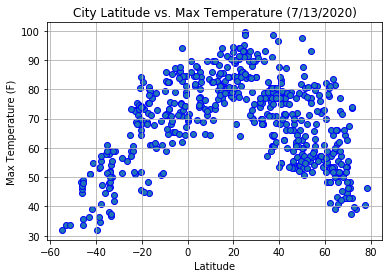

In [10]:
# For each of these, we need to extract the proper columns
# from weather_df.
Lat = weather_df['Latitude']
Max_Temp = weather_df['Max Temperature (F)']

plt.scatter(Lat, Max_Temp, edgecolors='b')
plt.title("City Latitude vs. Max Temperature (7/13/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('Output_Data/lat_temp_scatter.png')

## Latitude vs. Humidity Plot

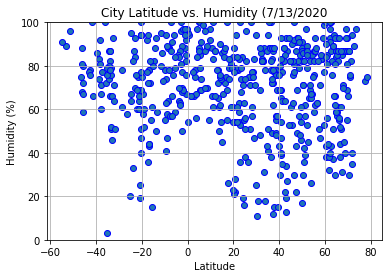

In [11]:
# Assuming Lat is still the same.
Humid = weather_df['Humidity']

plt.scatter(Lat, Humid, edgecolors='b')
plt.title("City Latitude vs. Humidity (7/13/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,100)
plt.grid()
plt.savefig('Output_Data/lat_hum_scatter.png')

## Latitude vs. Cloudiness Plot

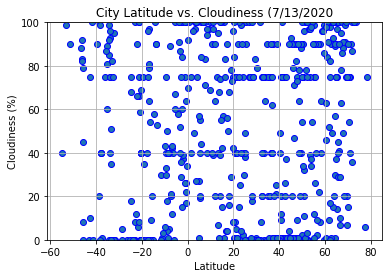

In [12]:
Clouds = weather_df['Cloudiness']

plt.scatter(Lat, Clouds, edgecolors='b')
plt.title("City Latitude vs. Cloudiness (7/13/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0,100)
plt.grid()
plt.savefig('Output_Data/lat_cloud_scatter.png')

## Latitude vs. Wind Speed Plot

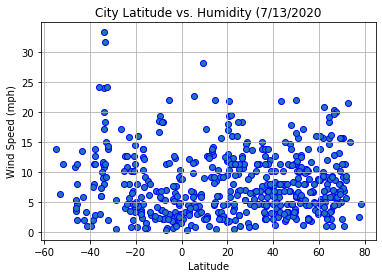

In [23]:
Wind = weather_df['Wind Speed']

plt.scatter(Lat, Wind, edgecolors='b')
plt.title("City Latitude vs. Humidity (7/13/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('Output_Data/lat_wind_scatter.png')

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared value is 0.4464.


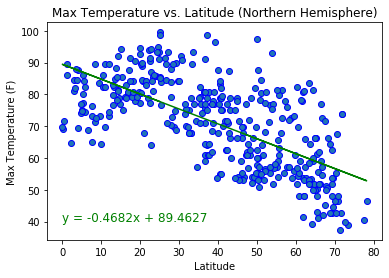

In [14]:
northern_weather_df = weather_df[weather_df['Latitude'] > 0]
southern_weather_df = weather_df[weather_df['Latitude'] < 0]

North_Lat = northern_weather_df['Latitude']
North_Max_Temp = northern_weather_df['Max Temperature (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_Lat, North_Max_Temp)
regression = North_Lat * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
rsquared = rvalue * rvalue

plt.scatter(North_Lat, North_Max_Temp, edgecolors="b")
plt.plot(North_Lat, regression, "g-")
plt.annotate(linear_equation, (0,40), fontsize=12,color="green")
plt.title('Max Temperature vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print("The r squared value is " + str(round(rsquared, 4)) + ".")
plt.savefig('Output_Data/lat_temp_reg_north.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared value is 0.6137.


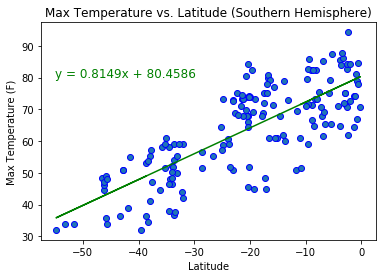

In [15]:
South_Lat = southern_weather_df['Latitude']
South_Max_Temp = southern_weather_df['Max Temperature (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_Lat, South_Max_Temp)
regression = South_Lat * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
rsquared = rvalue * rvalue

plt.scatter(South_Lat, South_Max_Temp, edgecolors="b")
plt.plot(South_Lat, regression, "g-")
plt.annotate(linear_equation, (-55,80), fontsize=12,color="green")
plt.title('Max Temperature vs. Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print("The r squared value is " + str(round(rsquared, 4)) + ".")
plt.savefig('Output_Data/lat_temp_reg_south.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared value is 0.0007.


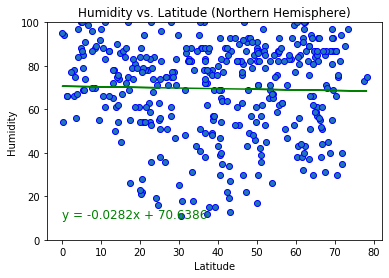

In [16]:
North_Lat = northern_weather_df['Latitude']
North_Humidity = northern_weather_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_Lat, North_Humidity)
regression = North_Lat * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
rsquared = rvalue * rvalue

plt.scatter(North_Lat, North_Humidity, edgecolors="b")
plt.plot(North_Lat, regression, "g-")
plt.annotate(linear_equation, (0,10), fontsize=12,color="green")
plt.title('Humidity vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(0,100)
print("The r squared value is " + str(round(rsquared, 4)) + ".")
plt.savefig('Output_Data/lat_hum_reg_north.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared value is 0.0015.


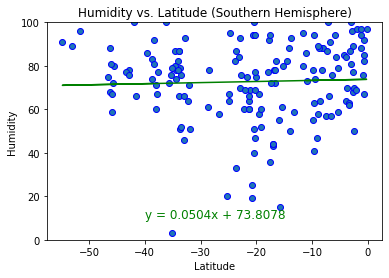

In [17]:
South_Lat = southern_weather_df['Latitude']
South_Humidity = southern_weather_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_Lat, South_Humidity)
regression = South_Lat * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
rsquared = rvalue * rvalue

plt.scatter(South_Lat, South_Humidity, edgecolors="b")
plt.plot(South_Lat, regression, "g-")
plt.annotate(linear_equation, (-40,10), fontsize=12,color="green")
plt.title('Humidity vs. Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(0,100)
print("The r squared value is " + str(round(rsquared, 4)) + ".")
plt.savefig('Output_Data/lat_hum_reg_south.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared value is 0.0034.


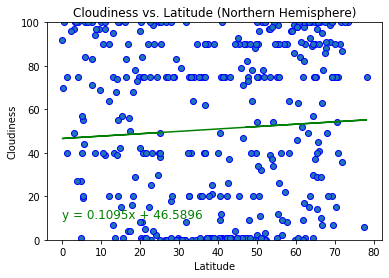

In [18]:
North_Lat = northern_weather_df['Latitude']
North_Cloudiness = northern_weather_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_Lat, North_Cloudiness)
regression = North_Lat * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
rsquared = rvalue * rvalue

plt.scatter(North_Lat, North_Cloudiness, edgecolors="b")
plt.plot(North_Lat, regression, "g-")
plt.annotate(linear_equation, (0,10), fontsize=12,color="green")
plt.title('Cloudiness vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(0,100)
print("The r squared value is " + str(round(rsquared, 4)) + ".")
plt.savefig('Output_Data/lat_cloud_reg_north.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared value is 0.0037.


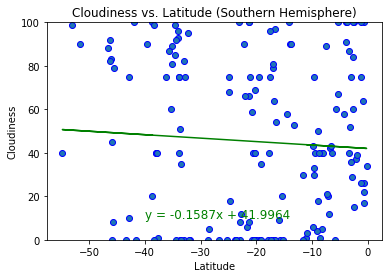

In [19]:
South_Lat = southern_weather_df['Latitude']
South_Cloudiness = southern_weather_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_Lat, South_Cloudiness)
regression = South_Lat * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
rsquared = rvalue * rvalue

plt.scatter(South_Lat, South_Cloudiness, edgecolors="b")
plt.plot(South_Lat, regression, "g-")
plt.annotate(linear_equation, (-40,10), fontsize=12,color="green")
plt.title('Cloudiness vs. Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(0,100)
print("The r squared value is " + str(round(rsquared, 4)) + ".")
plt.savefig('Output_Data/lat_cloud_reg_south.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared value is 0.0024.


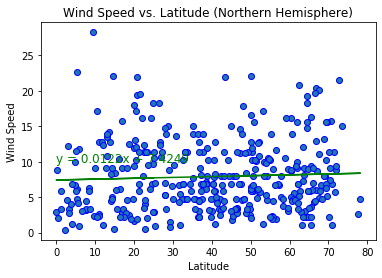

In [20]:
North_Lat = northern_weather_df['Latitude']
North_Wind = northern_weather_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_Lat, North_Wind)
regression = North_Lat * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
rsquared = rvalue * rvalue

plt.scatter(North_Lat, North_Wind, edgecolors="b")
plt.plot(North_Lat, regression, "g-")
plt.annotate(linear_equation, (0,10), fontsize=12,color="green")
plt.title('Wind Speed vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print("The r squared value is " + str(round(rsquared, 4)) + ".")
plt.savefig('Output_Data/lat_wind_reg_north.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared value is 0.0574.


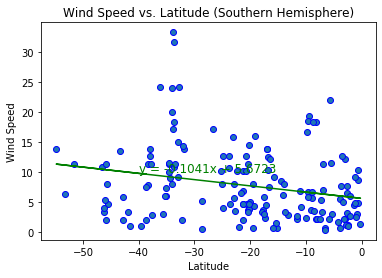

In [21]:
South_Lat = southern_weather_df['Latitude']
South_Wind = southern_weather_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_Lat, South_Wind)
regression = South_Lat * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
rsquared = rvalue * rvalue

plt.scatter(South_Lat, South_Wind, edgecolors="b")
plt.plot(South_Lat, regression, "g-")
plt.annotate(linear_equation, (-40,10), fontsize=12,color="green")
plt.title('Wind Speed vs. Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print("The r squared value is " + str(round(rsquared, 4)) + ".")
plt.savefig('Output_Data/lat_wind_reg_south.png')